In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, optimizers, Sequential

In [2]:
img_height = 180
img_width = 180

In [3]:
data_path = 'WasteImagesDataset'

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_path,
    image_size=(img_width,img_height),
    shuffle=True,
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42,
)

Found 5078 files belonging to 9 classes.
Using 4063 files for training.


In [5]:
data_temp = tf.keras.utils.image_dataset_from_directory(
    data_path,
    image_size=(img_width,img_height),
    shuffle=True,
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42,
)

Found 5078 files belonging to 9 classes.
Using 1015 files for validation.


In [6]:
train_size = int(len(data_temp)*.5)
train_size = int(len(data_temp)*.5)

In [7]:
data_test = data_temp.take(train_size)
data_val = data_temp.skip(train_size).take(train_size)

In [8]:
classes = data_train.class_names
classes

['Aluminium',
 'Carton',
 'Glass',
 'Organic Waste',
 'Other Plastics',
 'Paper and Cardboard',
 'Plastic',
 'Textiles',
 'Wood']

2024-04-01 22:24:41.567028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


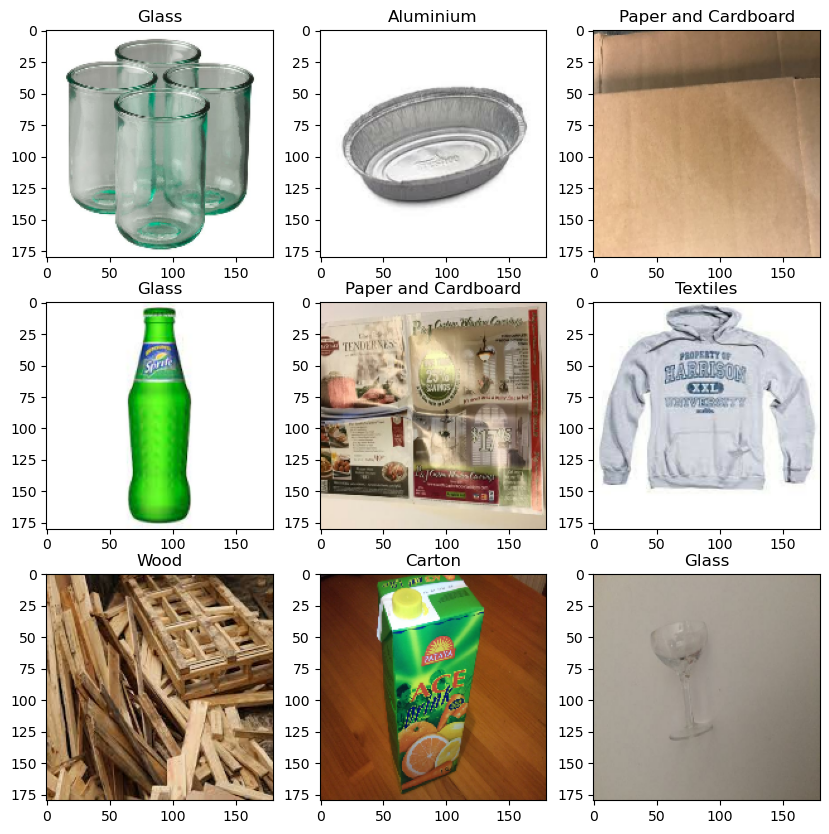

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.skip(1).take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
plt.show()

In [10]:
from collections import Counter
class_counter = Counter()

# Count the occurrences of each class label in the dataset
for _, labels in data_train:
    class_counter.update(labels.numpy())

# Print the frequency of each class
for class_label, count in class_counter.items():
    class_name = classes[class_label]
    print(f"Class: {class_name}, Frequency: {count}")

Class: Textiles, Frequency: 253
Class: Paper and Cardboard, Frequency: 1090
Class: Carton, Frequency: 263
Class: Plastic, Frequency: 404
Class: Wood, Frequency: 283
Class: Aluminium, Frequency: 631
Class: Glass, Frequency: 703
Class: Other Plastics, Frequency: 282
Class: Organic Waste, Frequency: 154


2024-04-01 22:25:34.194048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
class_counter = Counter()

for _, labels in data_test:
    class_counter.update(labels.numpy())

for class_label, count in class_counter.items():
    class_name = classes[class_label]
    print(f"Class: {class_name}, Frequency: {count}")

Class: Paper and Cardboard, Frequency: 157
Class: Organic Waste, Frequency: 29
Class: Other Plastics, Frequency: 30
Class: Aluminium, Frequency: 64
Class: Wood, Frequency: 25
Class: Plastic, Frequency: 52
Class: Textiles, Frequency: 50
Class: Glass, Frequency: 71
Class: Carton, Frequency: 34


2024-04-01 22:25:36.184853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
class_counter = Counter()

for _, labels in data_val:
    class_counter.update(labels.numpy())

for class_label, count in class_counter.items():
    class_name = classes[class_label]
    print(f"Class: {class_name}, Frequency: {count}")

Class: Textiles, Frequency: 41
Class: Aluminium, Frequency: 60
Class: Glass, Frequency: 75
Class: Paper and Cardboard, Frequency: 154
Class: Wood, Frequency: 40
Class: Plastic, Frequency: 42
Class: Carton, Frequency: 39
Class: Other Plastics, Frequency: 26
Class: Organic Waste, Frequency: 26


2024-04-01 22:25:37.868685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [14]:
pretrained_model_efficientb0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    classes=len(classes),
    classifier_activation="softmax",
)

for layer in pretrained_model_efficientb0.layers:
    layer.trainable=False

In [15]:
model = Sequential([
    pretrained_model_efficientb0,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='swish'),
    layers.Dropout(0.3),
    layers.Dense(9, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [18]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.002),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['acc']
)

In [19]:
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs = 15
)

Epoch 1/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 70s 506ms/step - acc: 0.7284 - loss: 0.7554 - val_acc: 0.8588 - val_loss: 0.4143
Epoch 2/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 65s 507ms/step - acc: 0.9232 - loss: 0.2150 - val_acc: 0.8748 - val_loss: 0.3513
Epoch 3/15
  8/127 ━━━━━━━━━━━━━━━━━━━━ 56s 473ms/step - acc: 0.9513 - loss: 0.1073

KeyboardInterrupt: 

In [94]:
model.evaluate(data_test)

16/16 [==============================] - 4s 265ms/step - loss: 0.5186 - acc: 0.9219


[0.5185924768447876, 0.921875]

In [95]:
history.history

{'loss': [0.44192710518836975,
  0.17152945697307587,
  0.10350966453552246,
  0.06981515884399414,
  0.0571107417345047,
  0.043060142546892166,
  0.0471920482814312,
  0.0372033417224884,
  0.03131062164902687,
  0.03635639324784279,
  0.043335508555173874,
  0.04099941626191139,
  0.044139597564935684,
  0.047986555844545364,
  0.03562850505113602],
 'acc': [0.844203770160675,
  0.9350233674049377,
  0.9630814790725708,
  0.9776027798652649,
  0.9803101420402527,
  0.9849864840507507,
  0.9844942092895508,
  0.9876938462257385,
  0.9879399538040161,
  0.9876938462257385,
  0.9854786992073059,
  0.986955463886261,
  0.9872015714645386,
  0.9840019941329956,
  0.990155041217804],
 'val_loss': [0.2817241847515106,
  0.2628970444202423,
  0.327173113822937,
  0.22188366949558258,
  0.21263407170772552,
  0.20729976892471313,
  0.3068186938762665,
  0.33356398344039917,
  0.37211546301841736,
  0.32977408170700073,
  0.37870368361473083,
  0.3340643644332886,
  0.28099656105041504,
  0.4

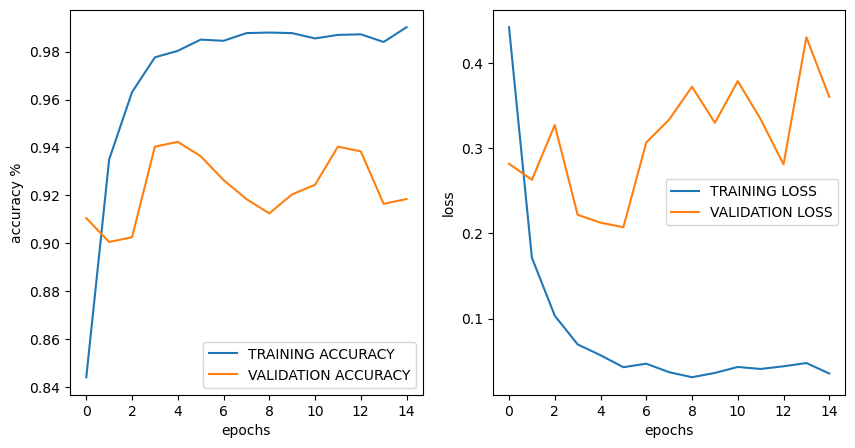

In [96]:
temp = range(15)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(temp,history.history.get('acc'),label = 'TRAINING ACCURACY')
plt.plot(temp,history.history.get('val_acc'),label = 'VALIDATION ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy %')
plt.legend()

plt.subplot(1,2,2)
plt.plot(temp,history.history.get('loss'),label = 'TRAINING LOSS')
plt.plot(temp,history.history.get('val_loss'),label = 'VALIDATION LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [111]:
images = []
labels = []
test_iterator = data_test.as_numpy_iterator()

for image, label in test_iterator:
    images.append(image)
    labels.append(label)

X_test = np.concatenate(images)
y_test = np.concatenate(labels)

print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_test Shape: (512, 180, 180, 3)
y_test Shape: (512,)


In [113]:
y_predicted = model.predict(X_test)
y_predicted

16/16 [==============================] - 8s 419ms/step


array([[3.20743120e-22, 2.68894018e-15, 5.15115358e-16, ...,
        1.02273015e-16, 2.76618264e-21, 6.35639833e-20],
       [5.59008062e-01, 1.81154792e-05, 1.00559909e-02, ...,
        1.45173851e-06, 9.30369026e-07, 1.04785007e-08],
       [2.13311591e-11, 2.74901613e-09, 2.23304318e-12, ...,
        2.43076892e-09, 1.37101688e-13, 1.50551021e-08],
       ...,
       [1.39315641e-18, 1.18190163e-17, 1.00000000e+00, ...,
        3.53758581e-12, 1.82530134e-16, 5.55961788e-17],
       [1.51283857e-12, 5.48475486e-16, 1.98820536e-16, ...,
        6.81737512e-17, 1.46944716e-14, 1.00000000e+00],
       [1.19014047e-04, 4.87473985e-11, 4.54904003e-10, ...,
        2.28763364e-09, 3.15892976e-06, 4.93247528e-04]], dtype=float32)

In [114]:
y_predicted = list(np.argmax(element) for element in y_predicted)
y_predicted

[5,
 0,
 5,
 0,
 8,
 7,
 7,
 0,
 3,
 6,
 1,
 4,
 5,
 7,
 7,
 5,
 5,
 5,
 5,
 6,
 3,
 8,
 0,
 5,
 1,
 4,
 2,
 1,
 3,
 2,
 5,
 4,
 8,
 6,
 8,
 6,
 7,
 6,
 5,
 1,
 0,
 8,
 3,
 5,
 8,
 0,
 1,
 7,
 3,
 4,
 6,
 5,
 5,
 7,
 5,
 2,
 4,
 2,
 5,
 5,
 8,
 1,
 1,
 7,
 5,
 5,
 8,
 0,
 3,
 5,
 5,
 0,
 8,
 0,
 0,
 0,
 5,
 5,
 2,
 3,
 5,
 4,
 5,
 0,
 5,
 3,
 5,
 3,
 1,
 3,
 0,
 3,
 2,
 2,
 5,
 2,
 4,
 4,
 5,
 2,
 0,
 0,
 0,
 2,
 1,
 8,
 6,
 5,
 0,
 5,
 5,
 7,
 5,
 0,
 7,
 5,
 2,
 2,
 4,
 0,
 1,
 0,
 5,
 8,
 2,
 5,
 1,
 0,
 6,
 6,
 5,
 8,
 4,
 0,
 1,
 2,
 5,
 1,
 0,
 0,
 1,
 5,
 1,
 0,
 5,
 5,
 0,
 7,
 6,
 3,
 3,
 5,
 5,
 8,
 5,
 7,
 5,
 5,
 6,
 1,
 2,
 2,
 4,
 2,
 7,
 5,
 2,
 5,
 2,
 2,
 0,
 8,
 5,
 2,
 3,
 6,
 0,
 2,
 0,
 2,
 8,
 0,
 6,
 5,
 5,
 4,
 7,
 6,
 2,
 2,
 3,
 3,
 8,
 5,
 7,
 2,
 7,
 3,
 4,
 2,
 0,
 5,
 5,
 8,
 4,
 1,
 0,
 6,
 6,
 2,
 5,
 0,
 5,
 0,
 5,
 5,
 2,
 5,
 0,
 5,
 5,
 0,
 7,
 3,
 8,
 7,
 7,
 6,
 2,
 5,
 5,
 0,
 2,
 2,
 5,
 4,
 2,
 2,
 0,
 2,
 5,
 7,
 3,
 3,
 7,
 5,
 3,
 5,
 5,
 4,


In [115]:
y_test

array([5, 5, 5, 0, 8, 7, 7, 0, 3, 6, 1, 4, 5, 7, 7, 5, 5, 5, 5, 6, 3, 7,
       0, 5, 1, 4, 2, 1, 3, 2, 5, 4, 8, 6, 8, 6, 7, 6, 5, 5, 0, 8, 3, 5,
       8, 0, 1, 7, 3, 4, 6, 5, 5, 7, 5, 2, 4, 2, 5, 5, 8, 1, 1, 7, 5, 5,
       8, 0, 3, 5, 5, 0, 8, 0, 0, 0, 5, 5, 2, 3, 5, 4, 5, 0, 5, 3, 5, 3,
       1, 3, 6, 3, 2, 2, 5, 2, 4, 4, 5, 3, 0, 0, 0, 2, 1, 3, 6, 5, 0, 5,
       5, 7, 5, 0, 7, 5, 2, 2, 4, 0, 0, 5, 5, 8, 2, 5, 1, 0, 6, 6, 5, 8,
       4, 0, 1, 2, 5, 1, 4, 0, 1, 5, 1, 0, 5, 5, 0, 7, 6, 3, 5, 5, 5, 8,
       5, 7, 5, 5, 6, 1, 2, 2, 4, 0, 7, 1, 2, 5, 2, 2, 0, 8, 5, 2, 3, 6,
       6, 2, 0, 2, 8, 0, 2, 5, 5, 4, 7, 6, 2, 2, 3, 3, 8, 5, 7, 2, 7, 3,
       4, 2, 0, 5, 5, 8, 4, 1, 1, 6, 6, 2, 5, 0, 5, 0, 5, 5, 2, 5, 0, 5,
       5, 0, 7, 3, 5, 7, 7, 6, 2, 5, 5, 0, 2, 2, 5, 4, 2, 2, 6, 2, 5, 7,
       3, 3, 7, 5, 3, 5, 5, 4, 2, 5, 5, 6, 5, 7, 8, 6, 2, 3, 5, 2, 6, 7,
       8, 2, 0, 5, 0, 3, 1, 6, 4, 0, 1, 7, 3, 1, 0, 5, 5, 5, 2, 4, 8, 2,
       1, 2, 5, 7, 5, 2, 5, 5, 0, 6, 5, 5, 2, 2, 7,

In [117]:
from sklearn.metrics import classification_report
print(f"Classification Report:\n {classification_report(y_test,y_predicted)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        62
           1       0.84      0.84      0.84        31
           2       0.93      0.95      0.94        74
           3       0.97      0.89      0.93        35
           4       0.97      0.88      0.92        33
           5       0.97      0.94      0.95       157
           6       0.91      0.93      0.92        43
           7       1.00      0.96      0.98        49
           8       0.84      0.96      0.90        28

    accuracy                           0.93       512
   macro avg       0.92      0.92      0.92       512
weighted avg       0.93      0.93      0.93       512



In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[ 57,   1,   3,   0,   0,   1,   0,   0,   0],
       [  2,  26,   0,   0,   1,   2,   0,   0,   0],
       [  2,   0,  70,   0,   0,   0,   2,   0,   0],
       [  0,   0,   2,  31,   0,   0,   0,   0,   2],
       [  1,   1,   0,   0,  29,   1,   1,   0,   0],
       [  4,   2,   0,   1,   0, 147,   1,   0,   2],
       [  3,   0,   0,   0,   0,   0,  40,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,  47,   1],
       [  0,   0,   0,   0,   0,   1,   0,   0,  27]])

Text(95.72222222222221, 0.5, 'Truth')

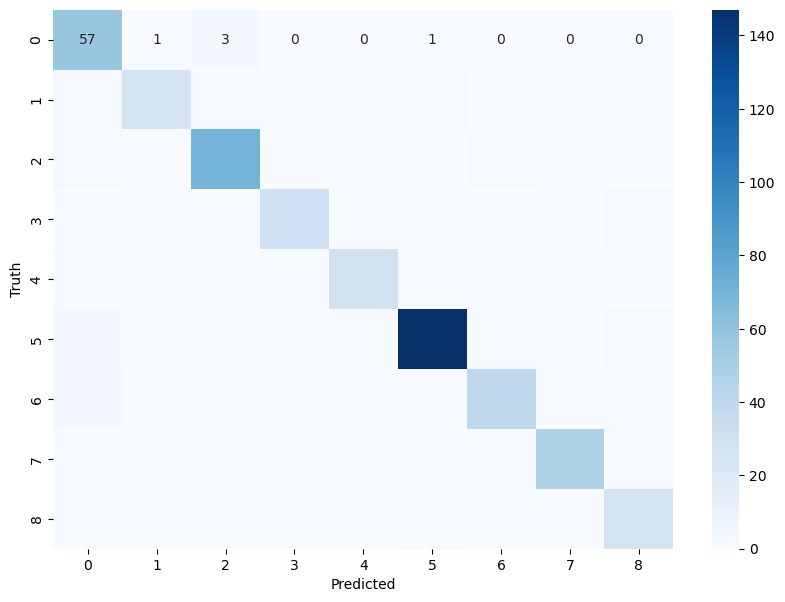

In [132]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm ,annot=True ,fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')